In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from einops import repeat, rearrange
from VIT_Model import VIT

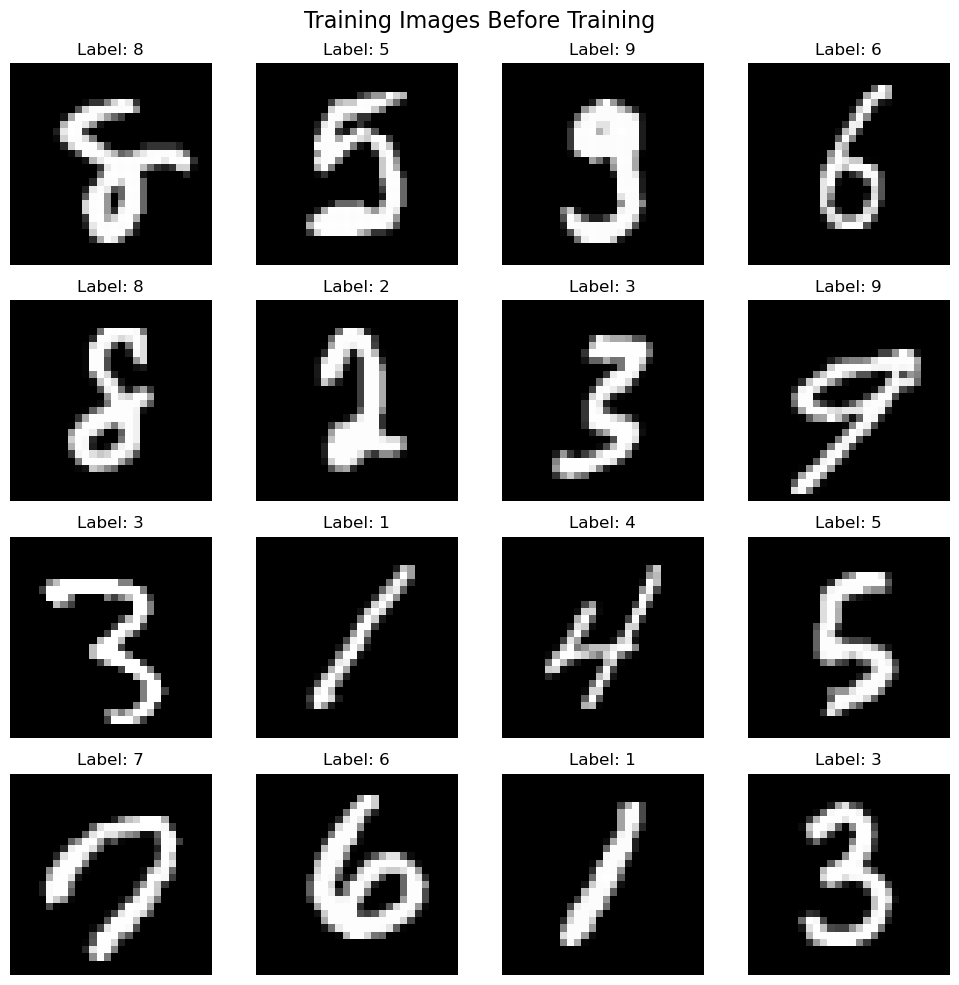

In [45]:
import matplotlib.pyplot as plt

# Function to display a batch of images
def show_images(images, labels, predictions=None, title="Images"):
    plt.figure(figsize=(10, 10))
    for i in range(16):  # Display the first 16 images
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        if predictions is not None:
            plt.title(f"True: {labels[i]}\nPred: {predictions[i]}", fontsize=10)
        else:
            plt.title(f"Label: {labels[i]}", fontsize=12)
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Show training images before training
train_data_iter = iter(train_loader)
train_images, train_labels = next(train_data_iter)
show_images(train_images.cpu(), train_labels.cpu(), title="Training Images Before Training")

In [43]:
# Hyperparameters
img_size = 28
patch_size = 4
embed_dim = 64
num_encoders = 6
num_heads = 4
hidden_dim = 256
dropout = 0.1
activation = 'gelu'
in_channels = 1  # MNIST is grayscale
num_classes = 10  # Digits 0-9
batch_size = 64
learning_rate = 1e-3
num_epochs = 10

# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model, Loss, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViT(img_size, num_classes, patch_size, embed_dim, num_encoders, num_heads, hidden_dim, dropout, activation, in_channels).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        # Forward
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
num_correct = 0
num_samples = 0

with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        scores = model(data)
        _, predictions = scores.max(1)
        num_correct += (predictions == targets).sum()
        num_samples += predictions.size(0)

print(f"Accuracy: {float(num_correct) / float(num_samples) * 100:.2f}%")

Epoch [1/10], Loss: 0.1684
Epoch [2/10], Loss: 0.2202
Epoch [3/10], Loss: 0.0880
Epoch [4/10], Loss: 0.3129
Epoch [5/10], Loss: 0.0362
Epoch [6/10], Loss: 0.0583
Epoch [7/10], Loss: 0.0134
Epoch [8/10], Loss: 0.0330
Epoch [9/10], Loss: 0.0365
Epoch [10/10], Loss: 0.1630
Accuracy: 98.56%


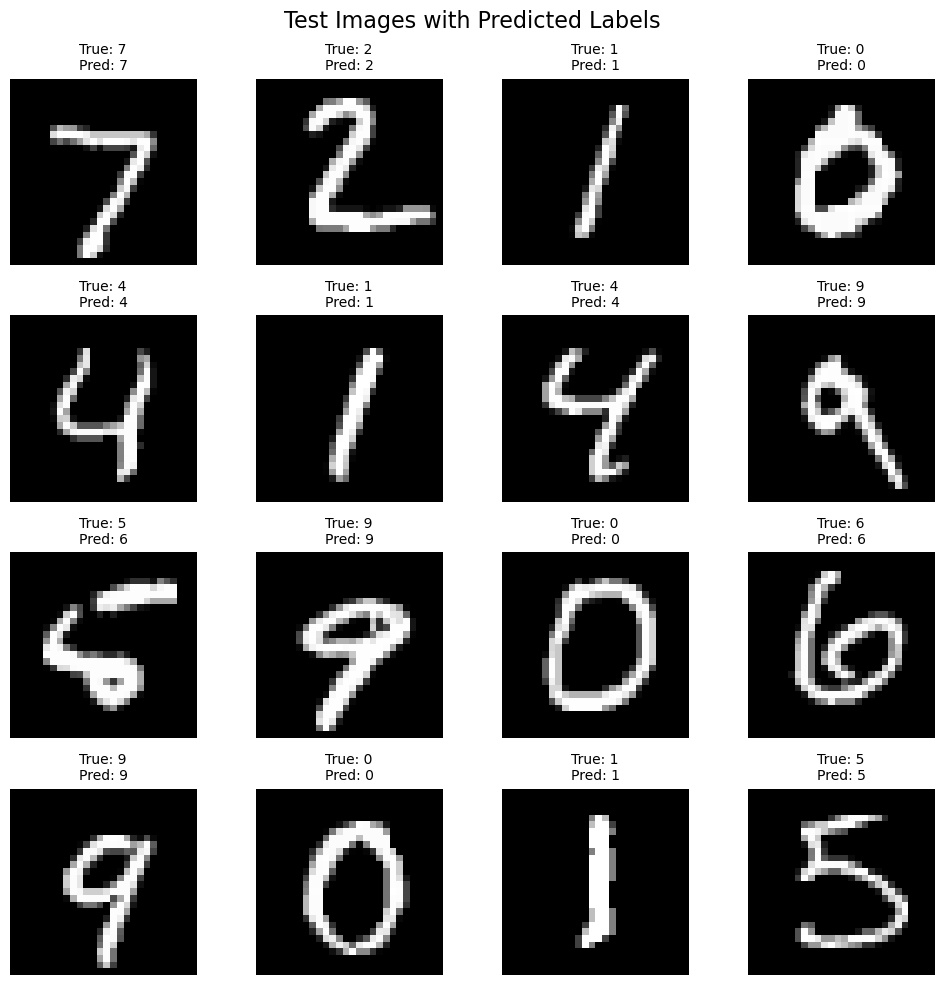

In [46]:
# Evaluation and visualization of predictions
model.eval()
test_data_iter = iter(test_loader)
test_images, test_labels = next(test_data_iter)

with torch.no_grad():
    test_images, test_labels = test_images.to(device), test_labels.to(device)
    scores = model(test_images)
    _, test_predictions = scores.max(1)

# Show test images with predicted labels
show_images(test_images.cpu(), test_labels.cpu(), test_predictions.cpu(), title="Test Images with Predicted Labels")